# Problem Set 5.2
## Iterating complex-valued functions

Remember to run this block first:

In [209]:
%matplotlib inline
%run ../common/helper.py

Now let's iterate a slightly more interesting function:

In [210]:
def square_and_subtract_one(z):
    return z*z - 1

Try calling the previous function on these complex numbers:

In [211]:
z1 = np.complex(1, 2)
z2 = np.complex(0.3, 0.7)
z3 = np.complex(np.sqrt(3)/2, 1.0/2.0)

z4 = square_and_subtract_one(z1) # Remove for student version
z5 = square_and_subtract_one(z2)
z6 = square_and_subtract_one(z3)

print("The input " + round_complex(z1) + " produced the output " + round_complex(z4))
print("The input " + round_complex(z2) + " produced the output " + round_complex(z5))
print("The input " + round_complex(z3) + " produced the output " + round_complex(z6))

The input 1.0+2.0j produced the output -4.0+4.0j
The input 0.3+0.7j produced the output -1.4+0.42j
The input 0.866+0.5j produced the output -0.5+0.866j


Now we need to figure out which complex numbers will stay small forever.

In [212]:
z = complex(0.3,0.5)

print("Before squaring and subtracting one, z = " + round_complex(z) + " which has magnitude " + round_magnitude(z))
for i in range(0,10):
    z = square_and_subtract_one(z)
    print("After squaring and subtracting one " + str(i + 1) + " time(s), z = "
          + round_complex(z) + " which has magnitude " + round_magnitude(z))

Before squaring and subtracting one, z = 0.3+0.5j which has magnitude 0.583
After squaring and subtracting one 1 time(s), z = -1.16+0.3j which has magnitude 1.198
After squaring and subtracting one 2 time(s), z = 0.256+-0.696j which has magnitude 0.741
After squaring and subtracting one 3 time(s), z = -1.42+-0.356j which has magnitude 1.463
After squaring and subtracting one 4 time(s), z = 0.887+1.01j which has magnitude 1.344
After squaring and subtracting one 5 time(s), z = -1.23+1.79j which has magnitude 2.175
After squaring and subtracting one 6 time(s), z = -2.69+-4.42j which has magnitude 5.172
After squaring and subtracting one 7 time(s), z = -13.3+23.8j which has magnitude 27.227
After squaring and subtracting one 8 time(s), z = -3.9e+02+-6.31e+02j which has magnitude 741.854
After squaring and subtracting one 9 time(s), z = -2.46e+05+4.92e+05j which has magnitude 550347.809
After squaring and subtracting one 10 time(s), z = -1.82e+11+-2.42e+11j which has magnitude 302882710348

Try changing the **initial value** and the **number of iterations** and running the code again.

### Visualizing orbits
Now let's visualize this sequence like we did in the previous problem set.

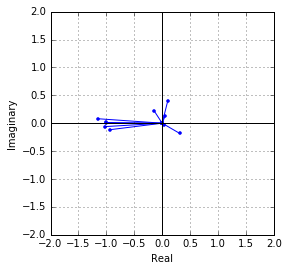

In [213]:
z = complex(0.1, 0.4)

# Create an empty list. This is where we'll store each complex number.
my_list = []

# Add z to the list.
my_list.append(z)

for i in range(0, 10):
    z = square_and_subtract_one(z)
    my_list.append(z)
    
plot_complex_list(my_list)

### An update to our function for generating sequences
Like in the previous problem set, we want to have a function we can use over and over again to test our hypotheses.

In [214]:
# z: The initial complex number
# n: The number of times to iterate

# This function takes two inputs and returns a list of complex numbers. 
def generate_sequence(z, num_iterations):
    
    # This is where we'll store our sequence.
    complex_sequence = [] 
    
    # We can use this structure (called a "for" loop) to execute a line n times.
    for i in range(num_iterations):
        
        # Put z at the end of the list
        complex_sequence.append(z)
        
        # Now apply the "rule" to z
        z = square_and_subtract_one(z)
    
    # Notice the indentation.
    return complex_sequence

Now, we can simply execute the following lines:

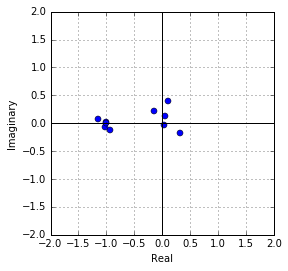

In [230]:
# The initial value
w = complex(0.1, 0.4)

# The number of iterations
n = 10

# Get the list...
my_list = generate_sequence(w, n)

# ... and plot it!
plot_complex_list(my_list, style="points")

Try changing the **initial value** and the **number of iterations** and running the code again.

### Question

How big does the magnitude need to get before we're satisfied that the sequence will **diverge**?

* This function should return `True` if the sequence will **converge**.
* This function should return `False` if the sequence will **diverge**.

Remember, **`z`** is the initial value.

In [ ]:
def is_small_forever(z):
    for i in range(0, 100):
        if np.absolute(z) > 2: # Blank this number in student version
            return False
        z = square_and_subtract_one(z)
    return True    

Let's test it out.

In [233]:
w = complex(0.1, 0.4)

is_small_forever(w)

True

Run it a few more times for different values of **`w`**.

### Julia sets
Suppose we plotted all the points in the complex plane for which `is_small_forever` returns `True`.

A *Julia set* is the collection of all points in the complex plane that give rise to convergent sequences under our rule.

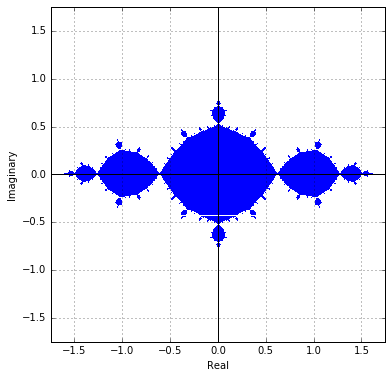

In [239]:
my_list = []

# Iterate over imaginary part
for b in np.linspace(-1.75, 1.75, num=335):
    
    # Iterate over real part
    for a in np.linspace(-1.75, 1.75, num=335):
        
        z = complex(a, b)
        if is_small_forever(z):
            my_list.append(z)

plot_complex_list(my_list, style="pixels", limit=1.75)            

In [235]:
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6.0
fig_size[1] = 6.0
plt.rcParams["figure.figsize"] = fig_size

In [418]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 1001), np.linspace(2, -2, 1001), indexing='xy')

In [419]:
coordinate_matrix = xx + 1j * yy

In [448]:
ff = iterations_to_diverge_generator(20)
print(iterations_to_diverge(complex(0.2, 0.1), 20))
print(ff(complex(0.2, 0.1)))

20
20


In [449]:
vfunc = np.vectorize(iterations_to_diverge_generator(20))

In [450]:
my_grid = vfunc(coordinate_matrix)
my_grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Need to re-implement as a grid

** Now need to update helper.py and encapsulate**

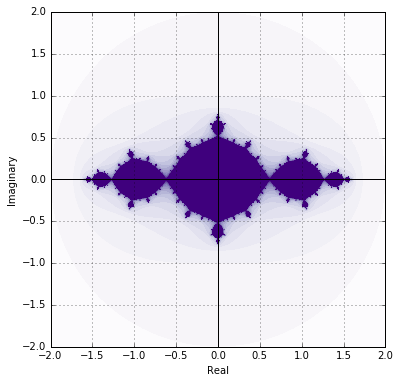

In [461]:
# size = 100
# my_grid = np.zeros((size, size))
# target_width = 2
# quadrant_width = (size - 1) / 2
# conversion_factor = target_width / quadrant_width

# for i in range(my_grid.shape[0]):
#     for j in range(my_grid.shape[1]):
#         real_part = (j - quadrant_width) * conversion_factor
#         imag_part = (i - quadrant_width) * conversion_factor
#         z = complex(real_part, imag_part)
#         if is_small_forever(z):
#             my_grid[i, j] = 1
#         else:
#             my_grid[i, j] = 0
#         print(round_complex(z) + " was assigned " + str(my_grid[i, j]))
            
# print(my_grid)

fig, ax = plt.subplots()
# heatmap = ax.pcolor(my_grid, cmap=plt.cm.Blues)

plt.ylabel('Imaginary')
plt.xlabel('Real')

ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.imshow(my_grid, extent=[-2, 2, -2, 2], cmap="Purples", alpha=1, interpolation="none")
plt.show()

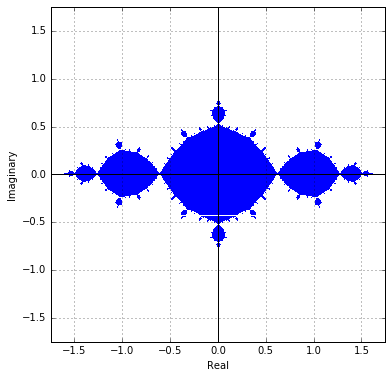

In [240]:

# Iterate over imaginary part
for b in np.linspace(-1.75, 1.75, num=335):
    
    # Iterate over real part
    for a in np.linspace(-1.75, 1.75, num=335):
        
        z = complex(a, b)
        if is_small_forever(z):
            my_list.append(z)

plot_complex_list(my_list, style="pixels", limit=1.75)            

In [446]:
# Make the parameters clearer

def iterations_to_diverge(z, max_iterations):
    for n in range(max_iterations):
        if np.absolute(z) > 2:
            return n
        z = square_and_subtract_one(z)
    return max_iterations

In [447]:
def iterations_to_diverge_generator(max_iterations):
    def fixed_iterations(z):
        return iterations_to_diverge(z, max_iterations)
    return fixed_iterations

### A more interesting picture
What if, instead of just using black and white, we used shades of gray based on the number of iterations before we're sure the sequence diverges?

In [192]:
my_list = []

# Iterate over imaginary part
for b in np.linspace(-1.75, 1.75, num=335): # 335 is a good number
    
    # Iterate over real part
    for a in np.linspace(-1.75, 1.75, num=335):
        
        z = complex(a, b)
        my_list.append([z, iterations_to_diverge(z)])

plot_complex_list(my_list, style="pixels", colors=True, limit=1.75)        